<a href="https://colab.research.google.com/github/hollowjumich/HW5/blob/main/JAH_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Q3
Please follow the instructions below and inspect the outputs before you proceed. You can always check this original final to compare your results in your own copy.

In [ ]:
#You have to make sure that you were able to write the file to a csv while your were working in R
house=pd.read_csv('/content/drive/MyDrive/DATA/house_prices.csv')
house.head()

,Unnamed: 0,date,state,unemploy_perc,house_price_index,house_price_perc
0,1,1976-01-01,Alabama,6.7,37.138285,0.040405
1,2,1976-02-01,Alabama,6.7,37.756437,0.051806
2,3,1976-03-01,Alabama,6.6,38.276319,0.059302
3,4,1976-04-01,Alabama,6.5,38.596135,0.059585
4,5,1976-05-01,Alabama,6.4,38.740517,0.055723


a) For the states below, please select the rows from the house dataframe, and consider converting the date column to date data type as it may be coming in string format. Then use the head function to preview your new dataframe.

In [ ]:
states = ['Michigan', 'California', 'Texas', 'Indiana']
#your code goes here

house['date'] = pd.to_datetime(house['date'])
#house.dtypes

selected_data = house[house['state'].isin(states)]
selected_data.head()
selected_data.dtypes


,0
Unnamed: 0,int64
date,datetime64[ns]
state,object
unemploy_perc,float64
house_price_index,float64
house_price_perc,float64


b) Use the FacetGrid from seaborn to create line plots to represent house_price_index for each state. Please make the line color red, set ticks on x axis for years ['1980', '2000', '2020'], which you may have to convert date type again, put those years as labels, and set the titles for each small plot to their state names. In addition, set the y label to 'house price index' and remove the x label since it's obvious that these are years.

<ipython-input-20-4049b28086e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['date_string'] = selected_data['date'].dt.strftime('%Y')


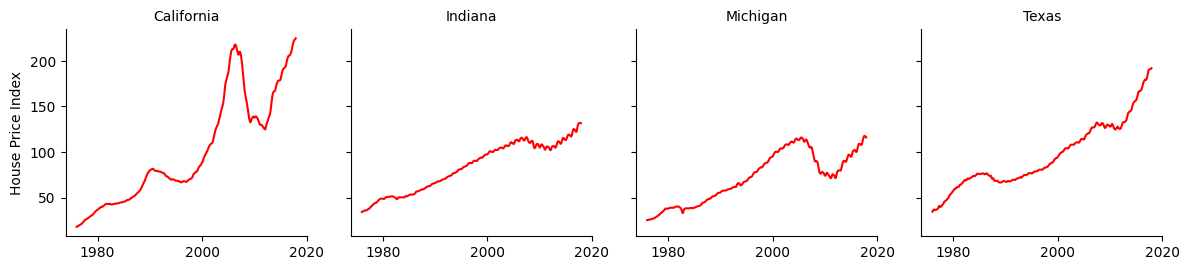

In [ ]:
#your code goes here
sd = sns.FacetGrid(selected_data, col='state')
sd.map(sns.lineplot, 'date', 'house_price_index', color='red')

#gemini prompt: how to convert data back to string for x tick labels
selected_data['date_string'] = selected_data['date'].dt.strftime('%Y')
sd.set(xticks=['1980', '2000', '2020'])
set_labels = sd.set_xticklabels(['1980', '2000', '2020'])
sd.set_titles(col_template='{col_name}')
sd.set_axis_labels('','House Price Index')


c) Draw a lineplot for 'house price perc', but color them based on the 'state' name which will have four lines in a single plot. Set a legend which will be at the bottom of your graph and have them horizantally positioned next to eachother. Again, set the y label to house_price_perc and remove the x label since it's obvious. (Note that my y label is still showing index. Please ignore that.)

Text(0.5, 0, '')

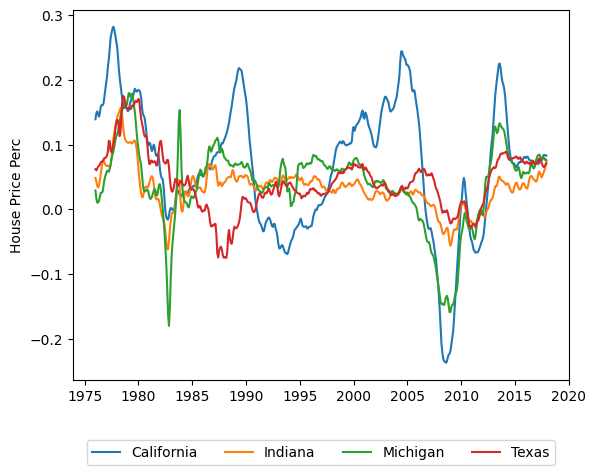

In [ ]:
#your code goes here
sns.lineplot(data=selected_data, x='date', y='house_price_perc', hue='state')
plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.25))
plt.ylabel('House Price Perc')
plt.xlabel('')
plt.title('House Price Perc by State')
plt.show()
